# Introdução

Olá seja bem-vinda e bem-vindo ao notebook da **aula 02**, desça até o conteúdo da aula 02 e bons estudos (Se clicar na seta antes do título Aula 01 ela comprime todo o conteúndo da aula 1, deixando o layout mais agradavél).

**Não esqueça de rodar todos as células de códigos da aula 01, antes de iniciar a aula 02**

In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]

In [3]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")


In [4]:
avaliacoes.shape

(100836, 4)

In [5]:
len(avaliacoes)

100836

In [6]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]


In [7]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")

In [8]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [9]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [10]:
avaliacoes["nota"].mean()

3.501556983616962

In [11]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [12]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

In [13]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [14]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")


In [15]:
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [16]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

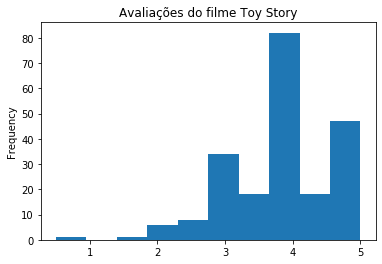

In [17]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

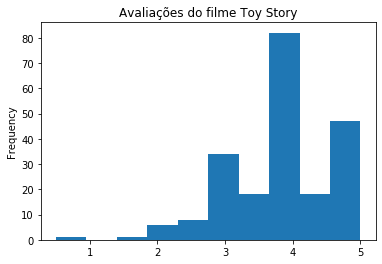

In [18]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

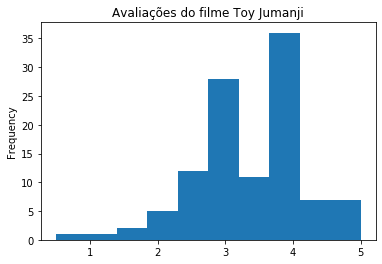

In [19]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Jumanji")

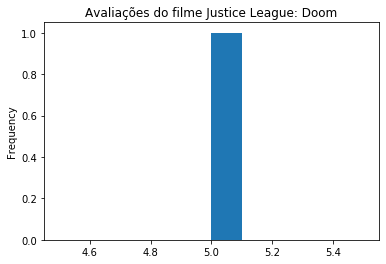

In [20]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

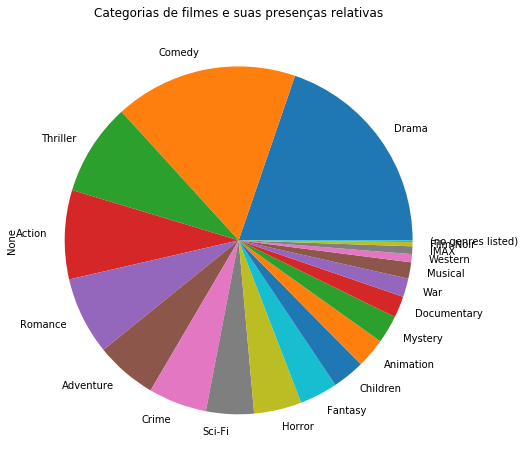

In [21]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

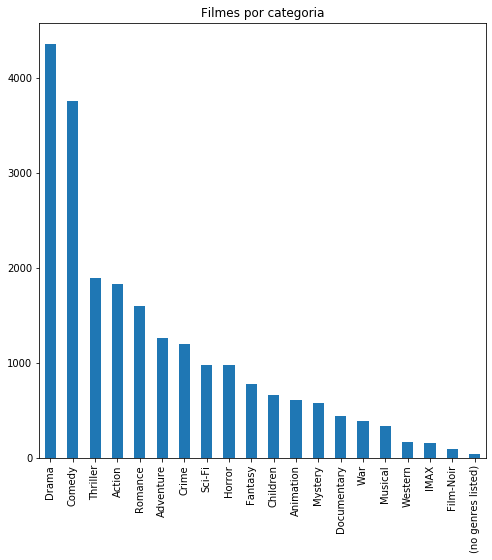

In [22]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

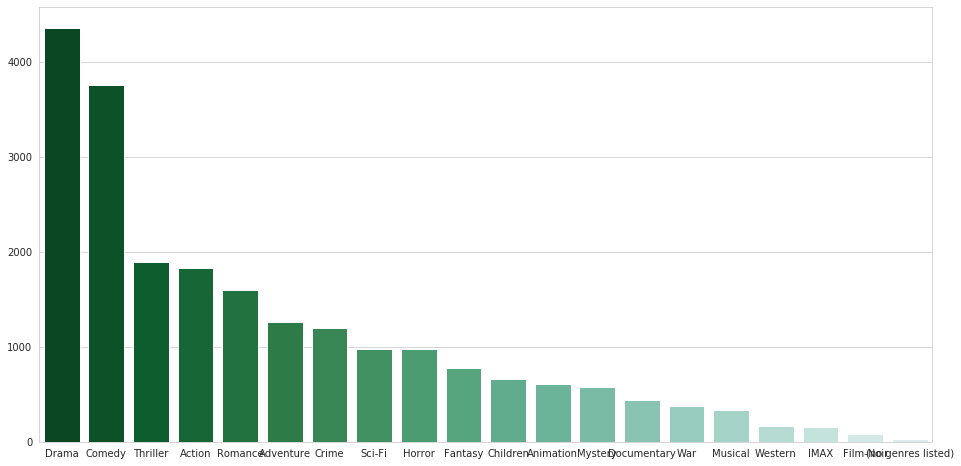

In [23]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Já, já explicamos o que foi feito em toda imagem, por agora repare como a imagem passa muito mais informação. Conseguimos comparar de forma fácil entre os gêneros e através do **mapa de calor** (gêneros com maior número tem um verde muito mais forte, gêneros com menor número é praticamente transparente) evidênciamos quais são as labels com maior participação, médias e insignificantes. Toda essa informação em uma única imagem!

Bom, agora vamos entender como foi o código.

Primeiro, não plotamos mais a imagem com o `.plot()` do pandas, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o [seaborn](https://seaborn.pydata.org/).

Segundo, chamamos o barplot do **seaborn**, adicionando uma **paleta de cores** com efeito de mapa de calor (parâmetro pallette), no parâmetro `n_color` de `sns.color_palette()` adicionamos **+4** para que a última barra não seja totalmente transparente.

Terceiro, também adicionamos o **sns.set_style("whitegrid")** para que todos os gráficos tenham a **linha de grade do eixo X** evidênte, facilitando a comparação entre as barras.

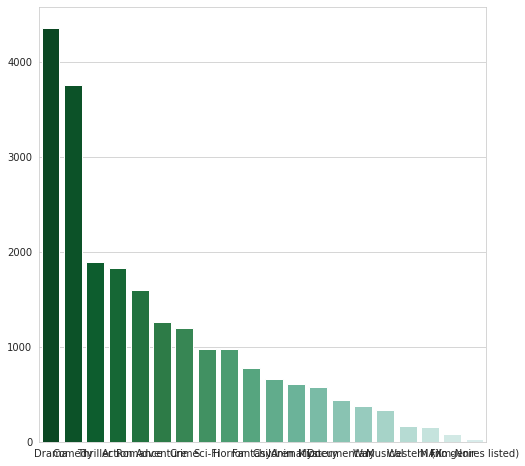

In [24]:
import seaborn as sns

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Por fim, mudamos o tamanho da imagem com o **figsize** do método`plt.figure()`. Assim, temos um gráfico com muitas informações e agradável de analisar.


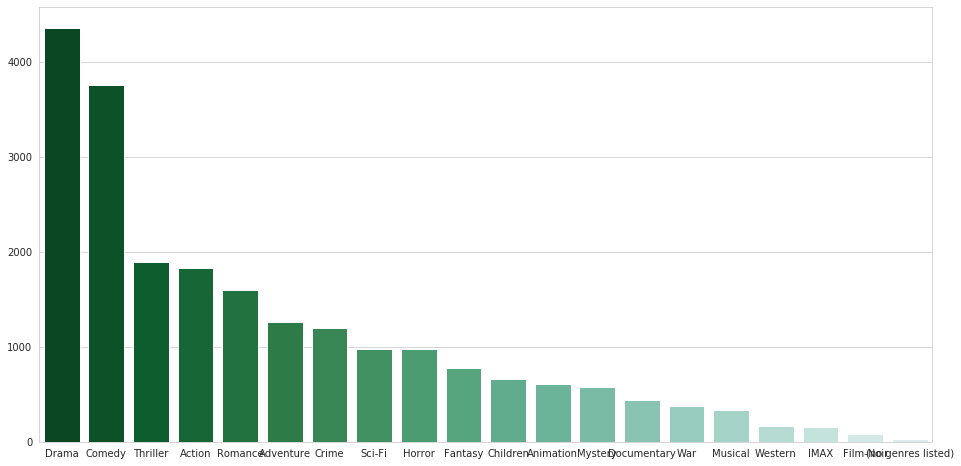

In [25]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Conseguimos analisar e tirar diversas conclusões trabalhando com a visualização dos gêneros. Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.

Na **aula 01** calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [26]:
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das ntoas para comparar alguns filmes. Por exemplo, **Toy Story e Jumanji**

3.9209302325581397


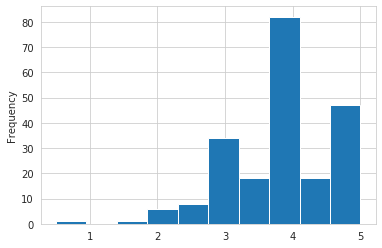

In [27]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


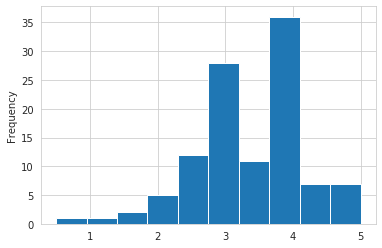

In [28]:
notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados. 

Lembra o exemplo que o Guilherme Silveira deu em aula comparando os sálarios de uma cidade? Olhando apenas para as médias dos salários não conseguimos evidênciar a desigualdade que havia entre as cidades. 

```python
#Cidada A
populacao = 1000
salario = 1100

media = 1100

#Cidade B
populacao = 1000
salario1 = 1000000
salario999 = 100

media = (salario1 * 1 + salario999 * 999) / 1000
media = 1099.00
```

P.S: Se tiver dúvidas reveja essa parte da aula e tente enteder o problema da média.


Outras métrica que pode nos ajudar a interpretar melhor os dados são os quatis, principalmente a [mediana](https://pt.wikipedia.org/wiki/Mediana_(estat%C3%ADstica))

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [29]:
filmes_com_media.sort_values("nota", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


Bom, ordenando os filmes pela nota médias e [fatiando](https://www.alura.com.br/artigos/listas-no-python) os dados entre 2450 e 2500, temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime *Wizard of Oz, **filmeId=919** e *Little Miss Sunshine* **filmeId=46578**.

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira função, assim passamos apenas o FilmeId e temos as informações desejadas.

In [30]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

Definimos nossa [função plot em python](https://www.caelum.com.br/apostila-python-orientacao-objetos/funcoes/#parmetros-de-funo) e repare que estamos usando **F-string** para fazer a interpolação dos dados, se tiver tiver dúvida veja essa [explicação no fórum da alura](https://cursos.alura.com.br/forum/topico-para-que-serve-o-print-f-no-python-77720).

Agora precisamos chamar a função!

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

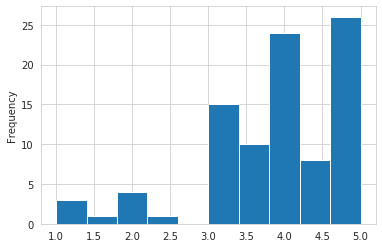

In [31]:
#Mágico de Oz
plot_filme(919)



A função plot, além de gerar o histograma também retorna algumas estatísticas. Vamos chamar a função agora para o filme *Little Miss Sunshine*.

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

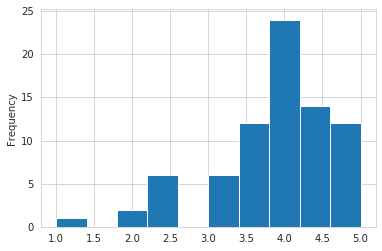

In [32]:
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do **Little mis sunshine**, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4). 

O que confirma nossa análise aqui é comparar os **25% 50% e 75%**. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os [**1° 2° e 3° quartis**](https://pt.wikipedia.org/wiki/Quartil). 

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o **Boxplot**. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

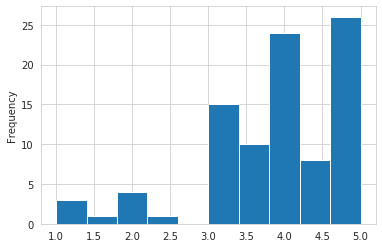

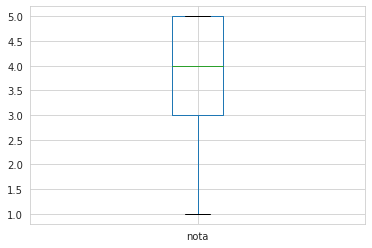

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [33]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

E aí, viu como é simples criar criar um [boxplot com o pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)?

Apenas chamamos o método ```.plot.box()```, agora o que precisamos fazer é interpretar este gráfico.

Vamos focar primeiro na "caixa" a linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo discribe()), a parte superior da caixa é o 3° Quartil (75%) e a parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.


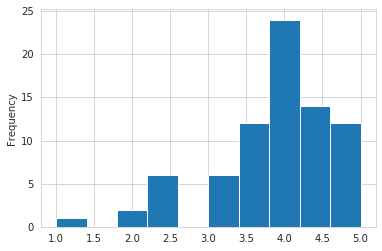

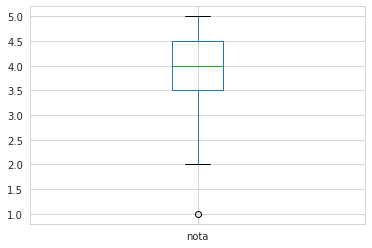

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [34]:
plot_filme(46578)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso temos essa bolinha localizada em **y=1**. A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de [outliers](https://pt.wikipedia.org/wiki/Outlier), existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Não vamos entrar em todos os detalhes do boxplot mas recomendo a explicação do [wikipedia](https://pt.wikipedia.org/wiki/Diagrama_de_caixa), ela é muito completa, cheias de exemplo e imagens para facilitar o entendimento.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre elas, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o **seaborn**, para aprendermos outra forma de plotar boxplot!


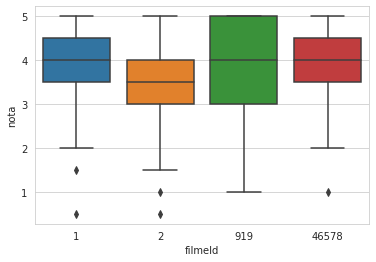

In [35]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Wizard of Oz e Little miss sunshine (usamos o `.query()` para selecionar os dados), **x** é o Id do filme e **y** as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais claram tente realiza a análise aí na sua casa!


Com isso nós fechamos nossa segunda aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!




## Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

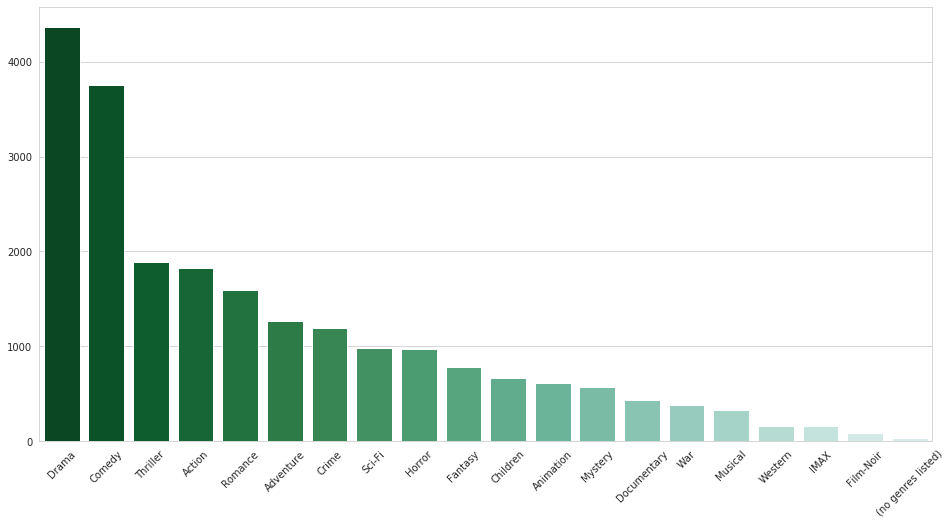

In [36]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
grafico = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)
plt.show()

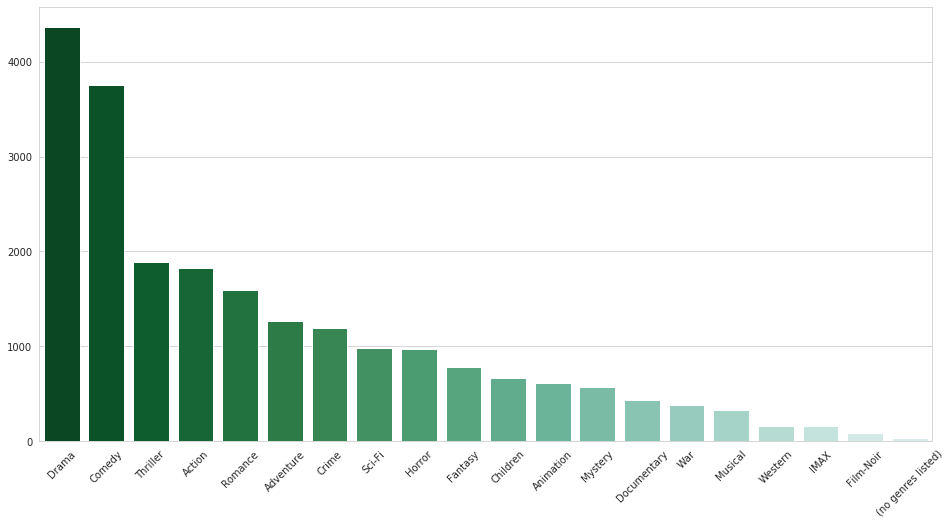

In [37]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
grafico = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

plt.xticks(rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [38]:
mediana_filme = avaliacoes.groupby("filmeId")["nota"].median()
mediana_filme = mediana_filme.rename("mediana")

In [39]:
mediana_filme.head()

filmeId
1    4.0
2    3.5
3    3.0
4    3.0
5    3.0
Name: mediana, dtype: float64

In [40]:
filmes_media_mediana = filmes_com_media.join(mediana_filme, on='filmeId')

In [41]:
count = 0
for i in range(len(filmes_media_mediana)):
    if filmes_media_mediana.loc[i, "mediana"] == 3 and filmes_media_mediana.loc[i, 'nota'] < 3.1:
        print(filmes_media_mediana.loc[i, :], end="\n\n")
        count += 1
        if count == 5:
            break


filmeId                           4
titulo     Waiting to Exhale (1995)
generos        Comedy|Drama|Romance
nota                        2.35714
mediana                           3
Name: 3, dtype: object

filmeId                                     5
titulo     Father of the Bride Part II (1995)
generos                                Comedy
nota                                  3.07143
mediana                                     3
Name: 4, dtype: object

filmeId                      8
titulo     Tom and Huck (1995)
generos     Adventure|Children
nota                     2.875
mediana                      3
Name: 7, dtype: object

filmeId                                    12
titulo     Dracula: Dead and Loving It (1995)
generos                         Comedy|Horror
nota                                  2.42105
mediana                                     3
Name: 11, dtype: object

filmeId                          15
titulo      Cutthroat Island (1995)
generos    Action|Adventure|Romance


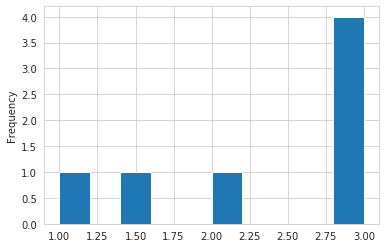

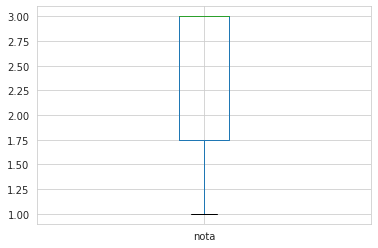

count    7.000000
mean     2.357143
std      0.852168
min      1.000000
25%      1.750000
50%      3.000000
75%      3.000000
max      3.000000
Name: nota, dtype: float64

In [42]:
plot_filme(4)

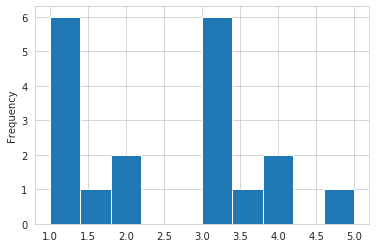

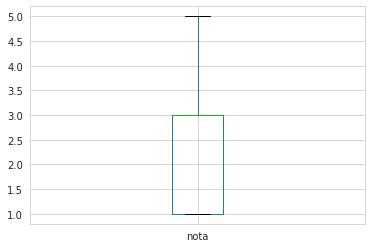

count    19.000000
mean      2.421053
std       1.250146
min       1.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: nota, dtype: float64

In [43]:
plot_filme(12)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [44]:
filmes_media_mediana.head()

,filmeId,titulo,generos,nota,mediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0


In [45]:
votos = avaliacoes.groupby('filmeId')['nota'].count()

In [46]:
votos = votos.rename('votos')

In [47]:
info_filmes = filmes_media_mediana.join(votos, on="filmeId")

In [48]:
top_10_mais_votados = info_filmes.sort_values(by='votos', ascending=False).head(10)

In [49]:
top_10_mais_votados

,filmeId,titulo,generos,nota,mediana,votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,4.0,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,4.5,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,4.5,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,4.0,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,4.5,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,4.5,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,4.0,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,4.0,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,4.0,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,4.5,220.0


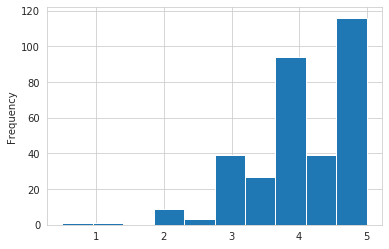

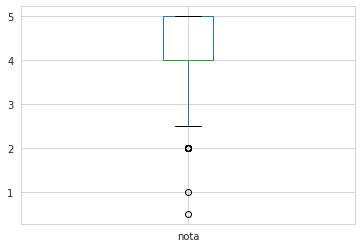

count    329.000000
mean       4.164134
std        0.831244
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [50]:
plot_filme(356)

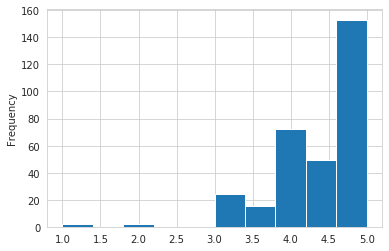

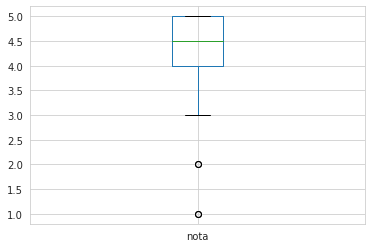

count    317.000000
mean       4.429022
std        0.713019
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [51]:
plot_filme(318)

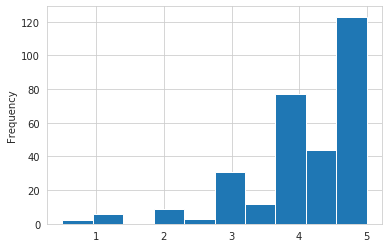

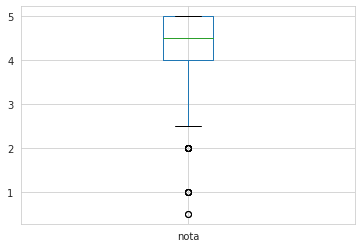

count    307.000000
mean       4.197068
std        0.951997
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [52]:
plot_filme(296)

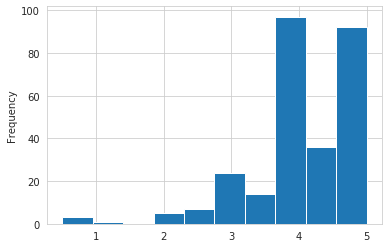

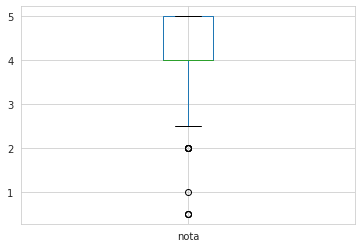

count    279.000000
mean       4.161290
std        0.853983
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [53]:
plot_filme(593)

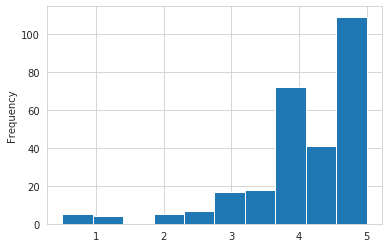

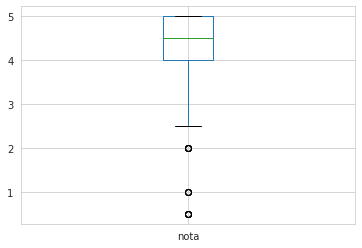

count    278.000000
mean       4.192446
std        0.975243
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [54]:
plot_filme(2571)

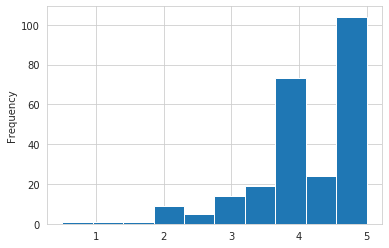

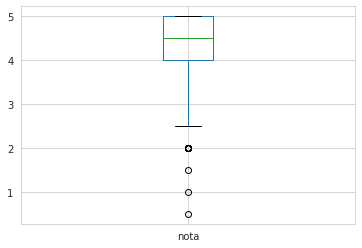

count    251.000000
mean       4.231076
std        0.872004
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [55]:
plot_filme(260)

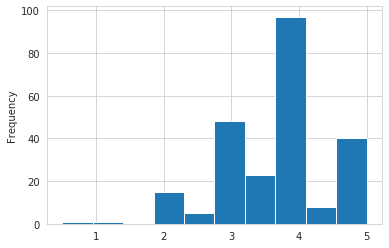

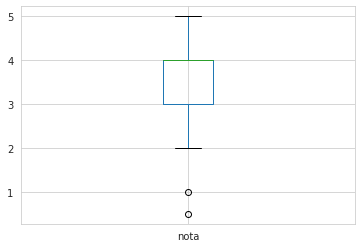

count    238.000000
mean       3.750000
std        0.855301
min        0.500000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [56]:
plot_filme(480)

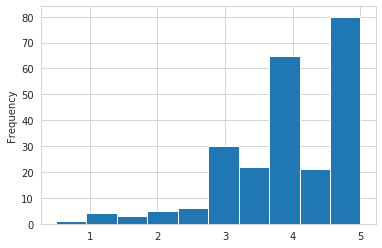

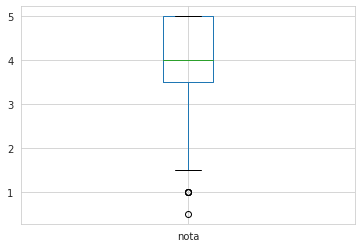

count    237.000000
mean       4.031646
std        0.967726
min        0.500000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [57]:
plot_filme(110)

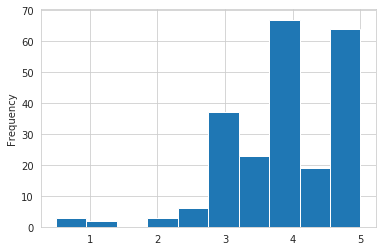

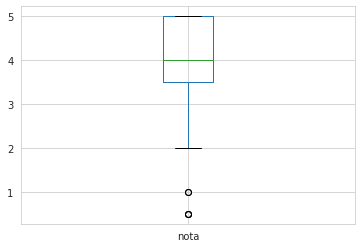

count    224.000000
mean       3.970982
std        0.926833
min        0.500000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [58]:
plot_filme(589)

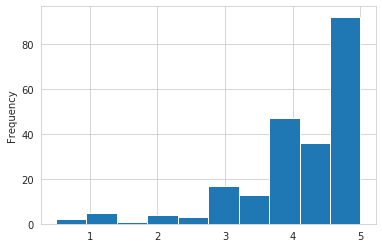

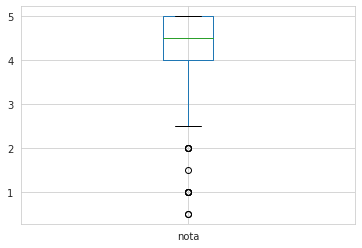

count    220.000000
mean       4.225000
std        0.975996
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [59]:
plot_filme(527)

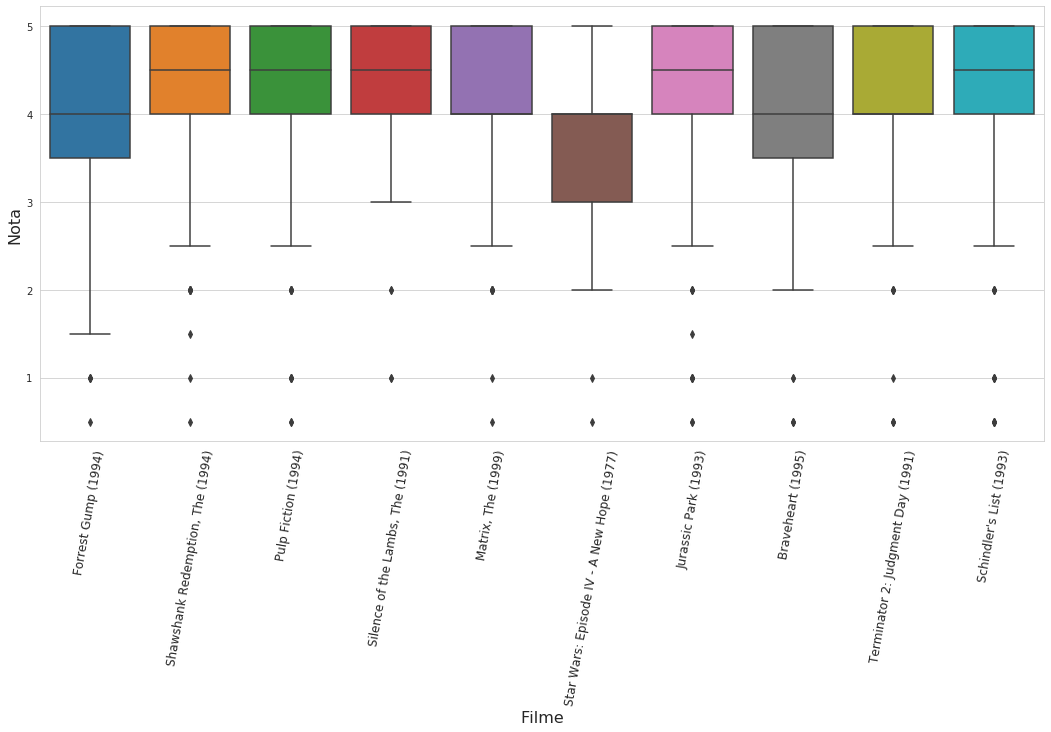

In [75]:
top_10_votos_por_filme = top_10_mais_votados.sort_values(by='votos', ascending=False).head(10)
top_10_votos_por_filme_titulos = top_10_votos_por_filme['titulo'].to_list()
top_10_votos_por_filme_ids = top_10_votos_por_filme['filmeId'].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query(f"filmeId in {top_10_votos_por_filme_ids}"))
ax.set_xticklabels(top_10_votos_por_filme_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=80)

plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

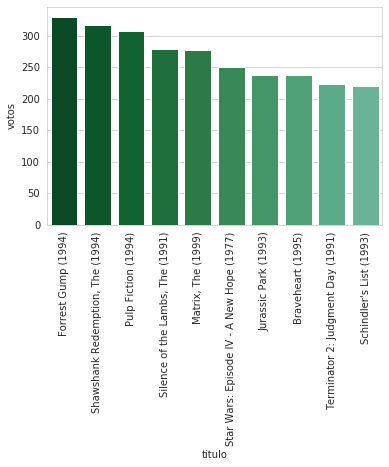

In [60]:
grafico = sns.barplot(x=top_10_mais_votados['titulo'],
            y=top_10_mais_votados['votos'],
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)))
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=90)
figsize=(10,10)

plt.show()

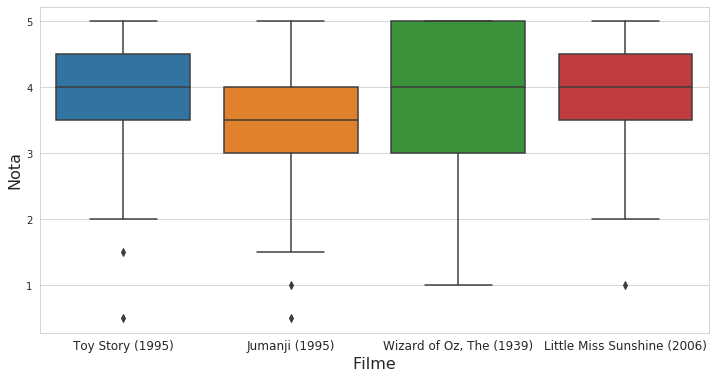

In [77]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [61]:
info_filmes.rename(columns = {'nota' : 'media'})

,filmeId,titulo,generos,media,mediana,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.5,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.0,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3.0,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0,49.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,4.0,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,3.5,1.0
9739,193585,Flint (2017),Drama,3.500000,3.5,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,3.5,1.0


In [62]:
dados_filme = []
moda = [0 for i in range(len(info_filmes))]
moda = pd.Series(moda)


In [63]:
moda = moda.rename('moda')
info_filmes = info_filmes.join(moda, on='filmeId')

In [64]:
#incorreto
for i in range(1, len(info_filmes)):
    try:
        moda_teste = avaliacoes.query('filmeId==' + str(i))["nota"].mode()
        info_filmes.at[i, 'moda'] = moda_teste
    except:
        info_filmes.at[i, 'moda'] = 0


In [65]:
info_filmes.head()

,filmeId,titulo,generos,nota,mediana,votos,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0,215.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.5,110.0,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.0,52.0,4.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3.0,7.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0,49.0,3.0


In [78]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [79]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


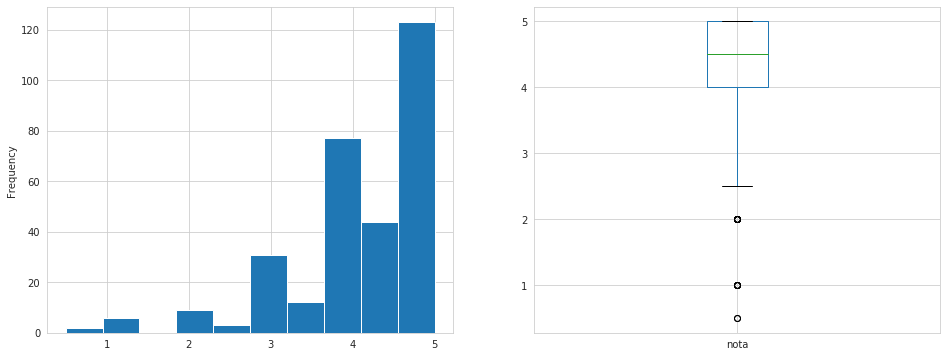

In [80]:
pulp_fiction = avaliacoes.query('filmeId == 296')['nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])

plt.show()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [81]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,nota,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995
